In [1]:
import cartopy

In [3]:
import xarray as xr
import sys
sys.path.insert(0,"/Users/auraoupa/lib/python")

import numpy as np
sys.path.insert(0,"/Users/auraoupa/Work/git/xscale")
from matplotlib.colors import LogNorm
import matplotlib.pylab as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import dask


In [4]:
gridfile="/Users/auraoupa/Data/eNATL60/eNATL60-I/mesh_mask_eNATL60_3.6.nc"
dsgrid=xr.open_mfdataset(gridfile)
ff=dsgrid['ff']

In [6]:
def plot_surf(sub,data,lon,lat,vmin,vmax,cmap,title):
    
    ax = plt.subplot(sub,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((-50, -30, 30, 50))
    land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.pcolormesh(lon,lat,data,cmap=cmap,vmin=vmin,vmax=vmax )
    plt.colorbar(orientation='horizontal',pad=0.1)
    plt.title(title)

    ax.plot([-40, -39], [40, 40],color='black',linewidth=4)
    ax.plot([-40, -39], [41, 41],color='black',linewidth=4)
    ax.plot([-40, -40], [40, 41],color='black',linewidth=4)
    ax.plot([-39, -39], [40, 41],color='black',linewidth=4)


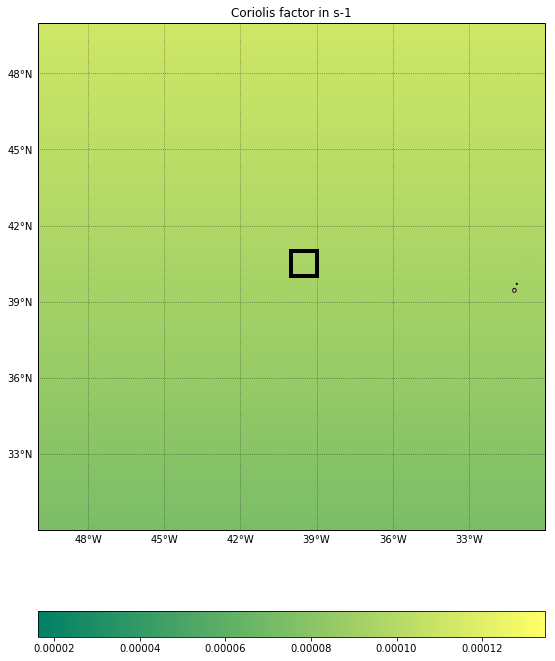

In [9]:
fig=plt.figure(figsize=(20,15))

navlat= dsgrid['nav_lat']
navlon= dsgrid['nav_lon']
plot_surf(121,ff[0],navlon,navlat,np.min(ff[0].values),np.max(ff[0].values),'summer','Coriolis factor in s-1')

